In [ ]:
#import library
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
car_dataset=pd.read_csv('CarPrice_Assignment.csv',encoding='latin-1')
print('car_dataset')

car_dataset


In [ ]:
car_dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [ ]:
car_dataset.tail()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Medium
204,205,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625,21.70,Medium


In [ ]:
car_dataset.shape

(205, 26)

In [ ]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.702439,27.708780
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.848977,6.649183
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,14.800000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,21.950000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,26.700000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,31.800000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,51.250000


In [ ]:
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
car_dataset.head(5)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [ ]:
car_dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
CompanyName = car_dataset['CarName'].apply(lambda x : x.split(' ')[0])
car_dataset.insert(3,"CompanyName",CompanyName)
car_dataset.drop(['CarName'],axis=1,inplace=True)


In [ ]:
car_dataset.head(1)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_176, *['car_ID', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_177, *['symboling', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_178, *['wheelbase', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_179, *['carlength', 'count()', None], **{})
chart

In [ ]:
car_dataset.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
car_dataset.CompanyName = car_dataset.CompanyName.str.lower()

In [ ]:
car_dataset.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
def replace_name(a,b):
    car_dataset.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [ ]:
car_dataset.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
car_dataset.loc[car_dataset.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_180, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_181, *['car_ID', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_182, *['symboling', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_183, *['wheelbase', 'count()', None], **{})
chart

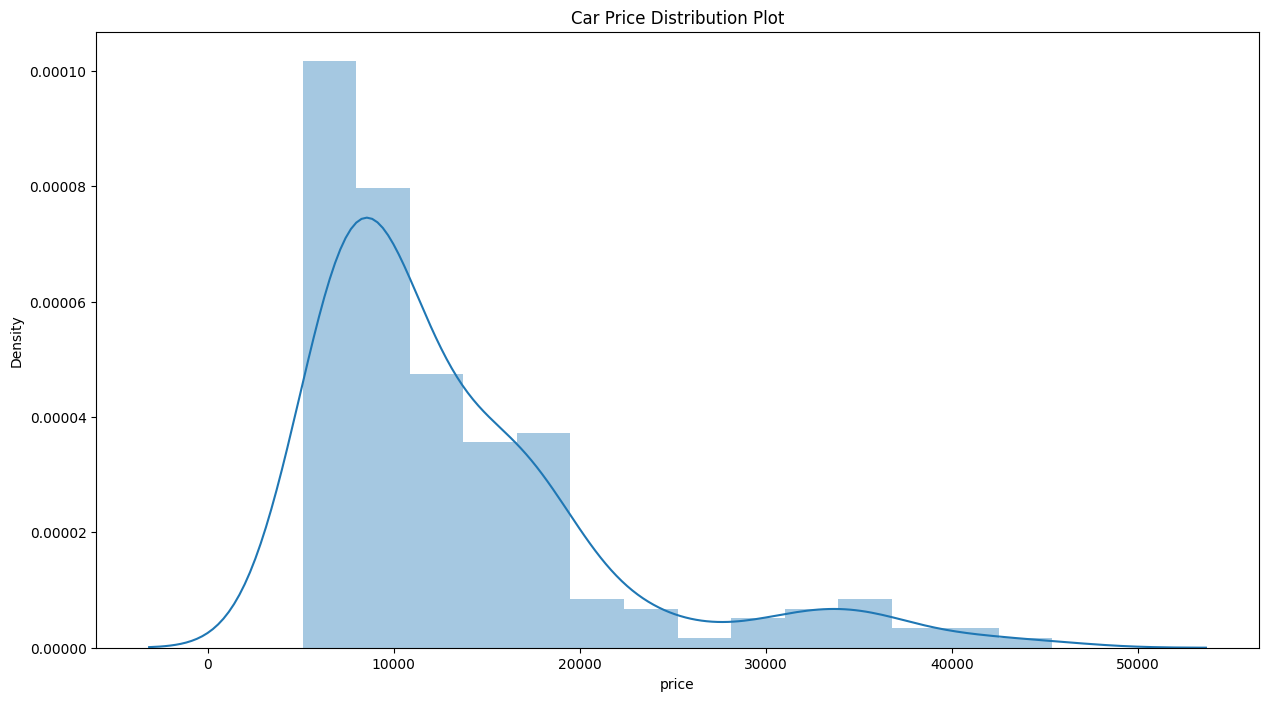

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Car Price Distribution Plot')
sns.distplot(car_dataset.price)
plt.show()



In [ ]:

car_dataset.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

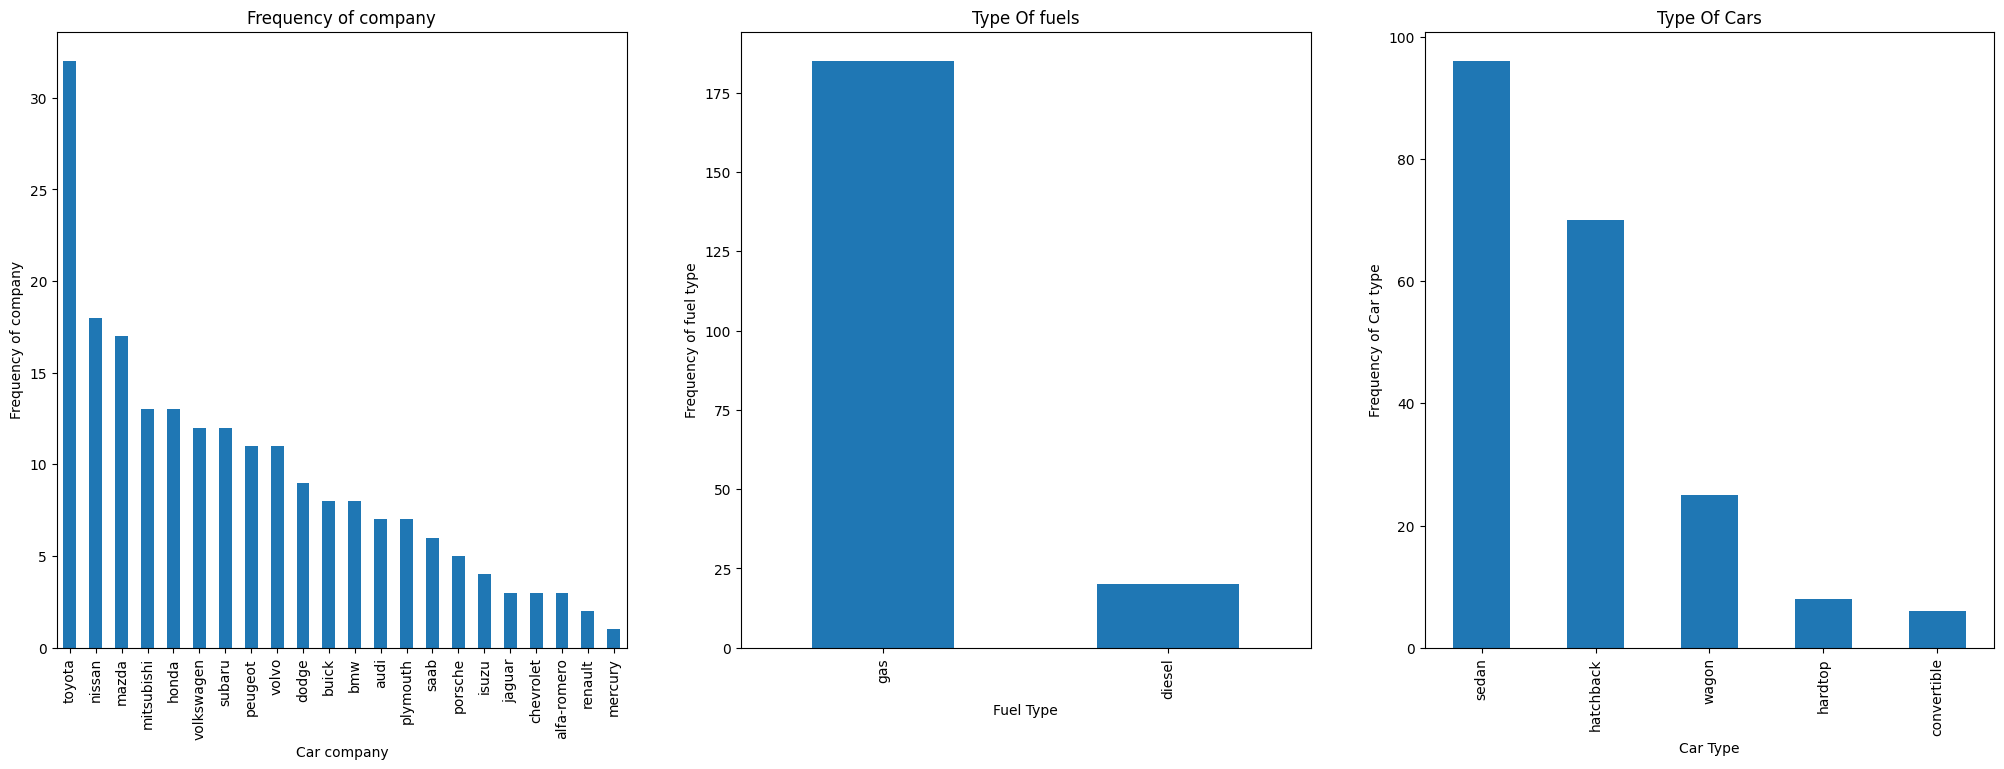

In [ ]:
plt.figure(figsize=(25, 8))

plt.subplot(1,3,1)
plt1 = car_dataset.CompanyName.value_counts().plot(kind='bar')
plt.title('Frequency of company')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = car_dataset.fueltype.value_counts().plot(kind='bar')
plt.title('Type Of fuels')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = car_dataset.carbody.value_counts().plot(kind='bar')
plt.title('Type Of Cars')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

In [ ]:
car_dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


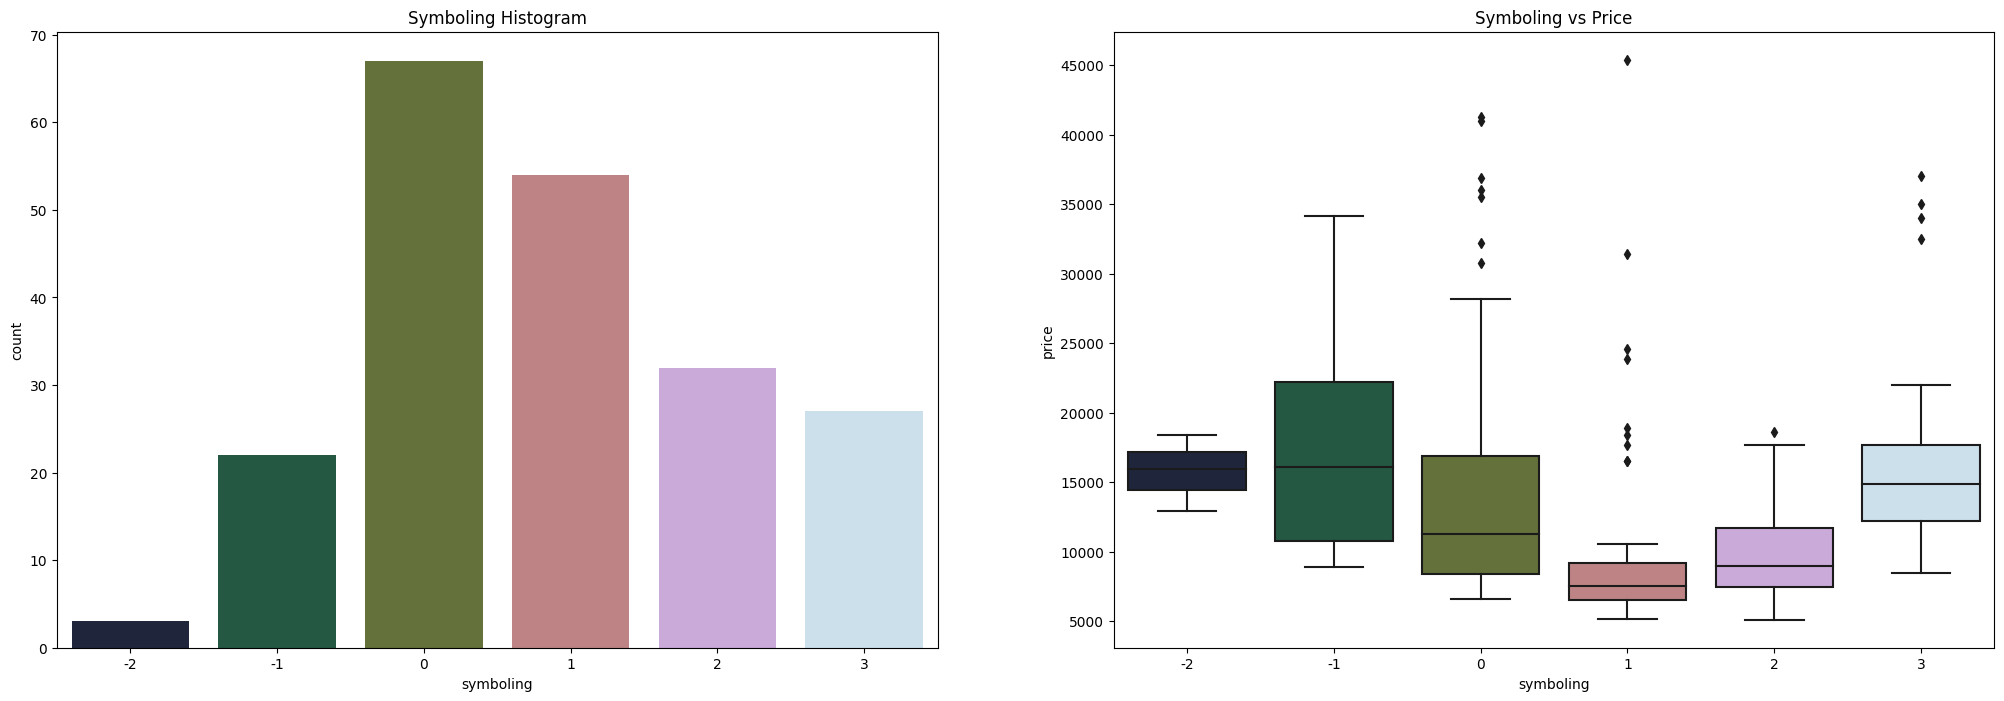

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(car_dataset.symboling, x=car_dataset.symboling,palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car_dataset.symboling, y=car_dataset.price, palette=("cubehelix"))

plt.show()

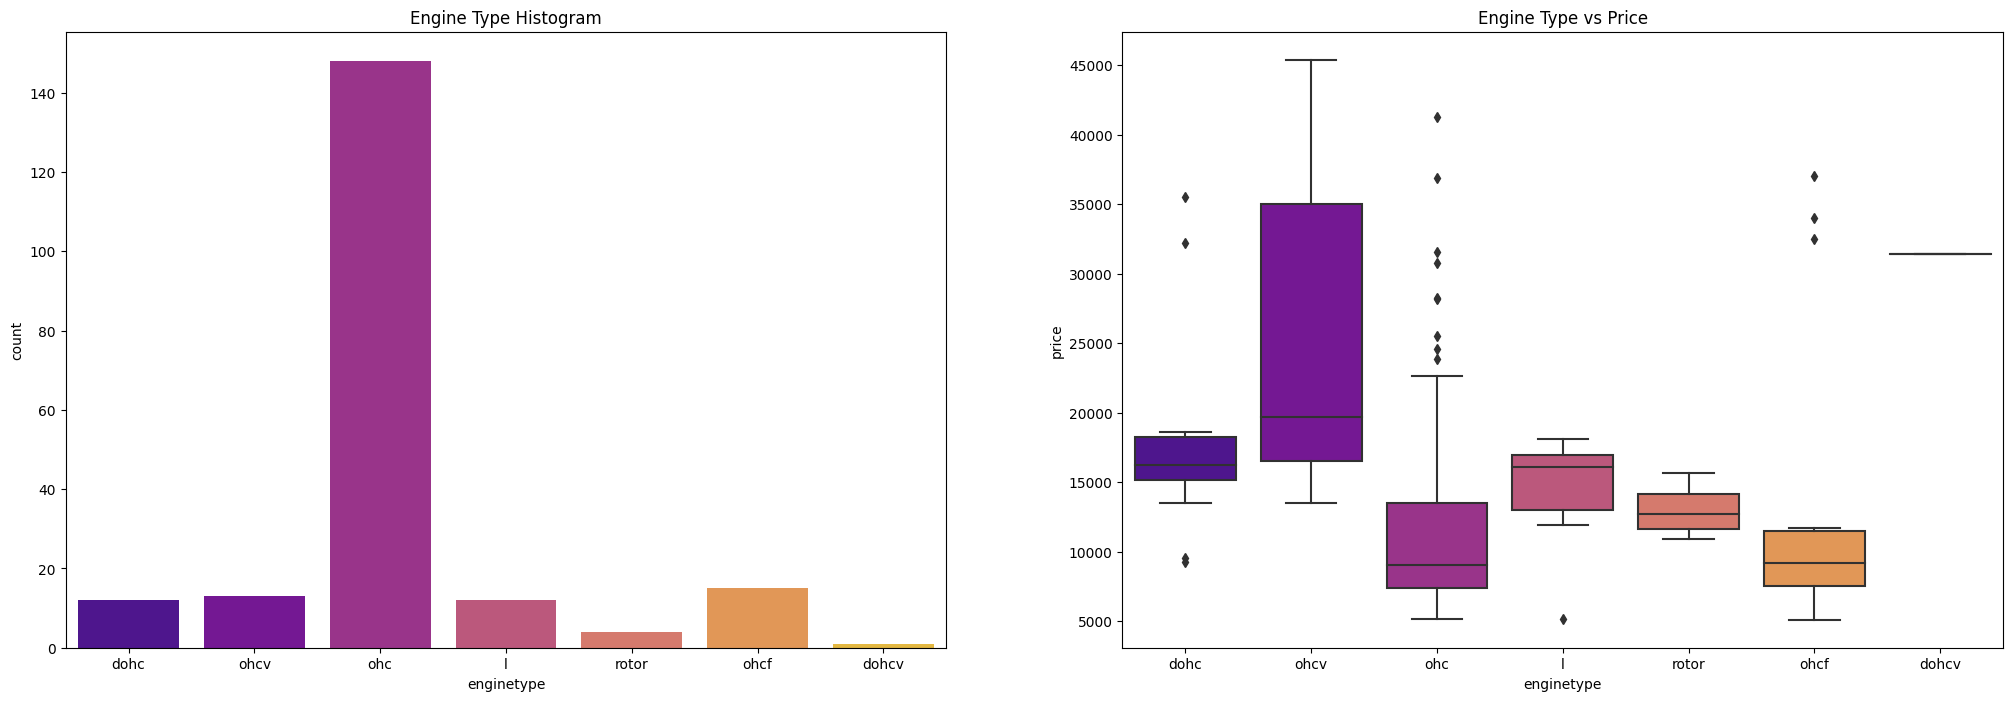

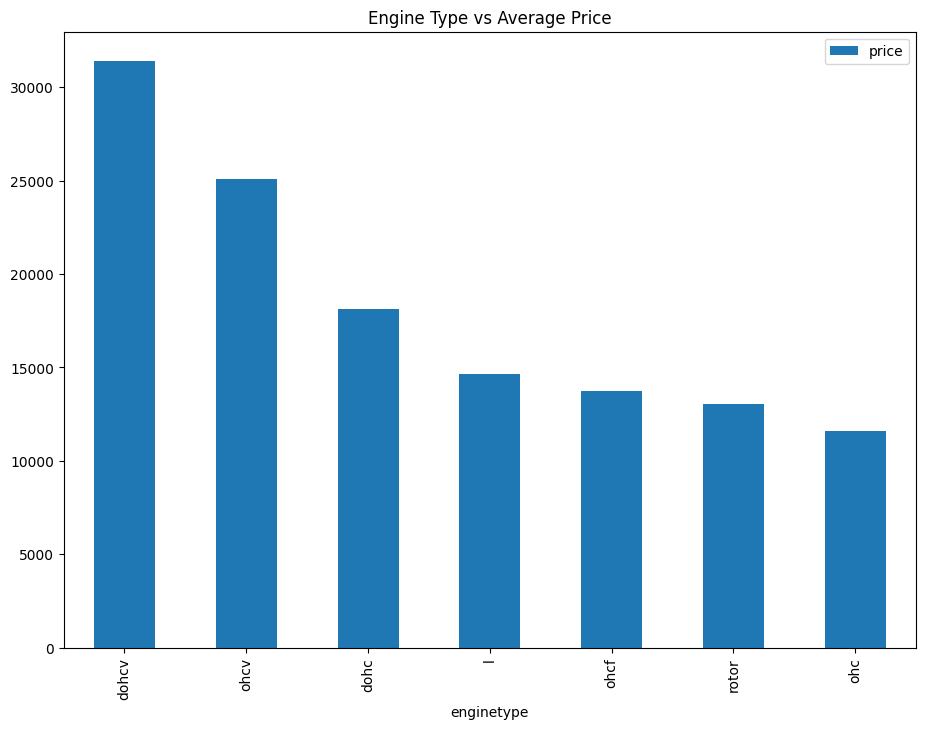

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(car_dataset.enginetype, x=car_dataset.enginetype,palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=car_dataset.enginetype, y=car_dataset.price, palette=("plasma"))

plt.show()

df = pd.DataFrame(car_dataset.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(11,8))
plt.title('Engine Type vs Average Price')
plt.show()

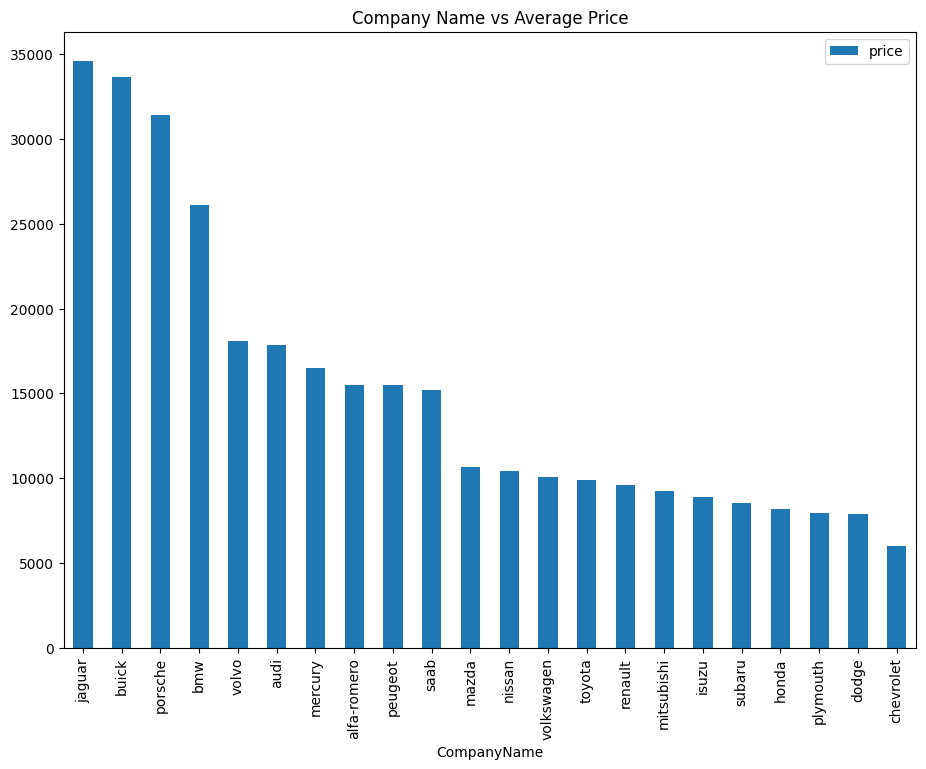

In [ ]:
df = pd.DataFrame(car_dataset.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(11,8))
plt.title('Company Name vs Average Price')
plt.show()


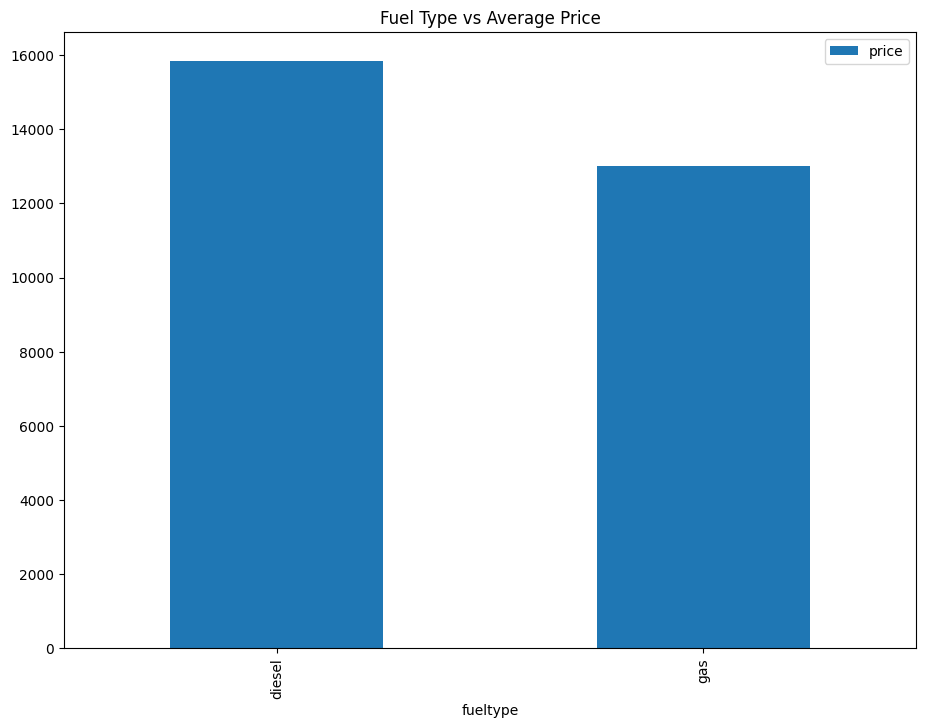

In [ ]:
df = pd.DataFrame(car_dataset.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(11,8))
plt.title('Fuel Type vs Average Price')
plt.show()

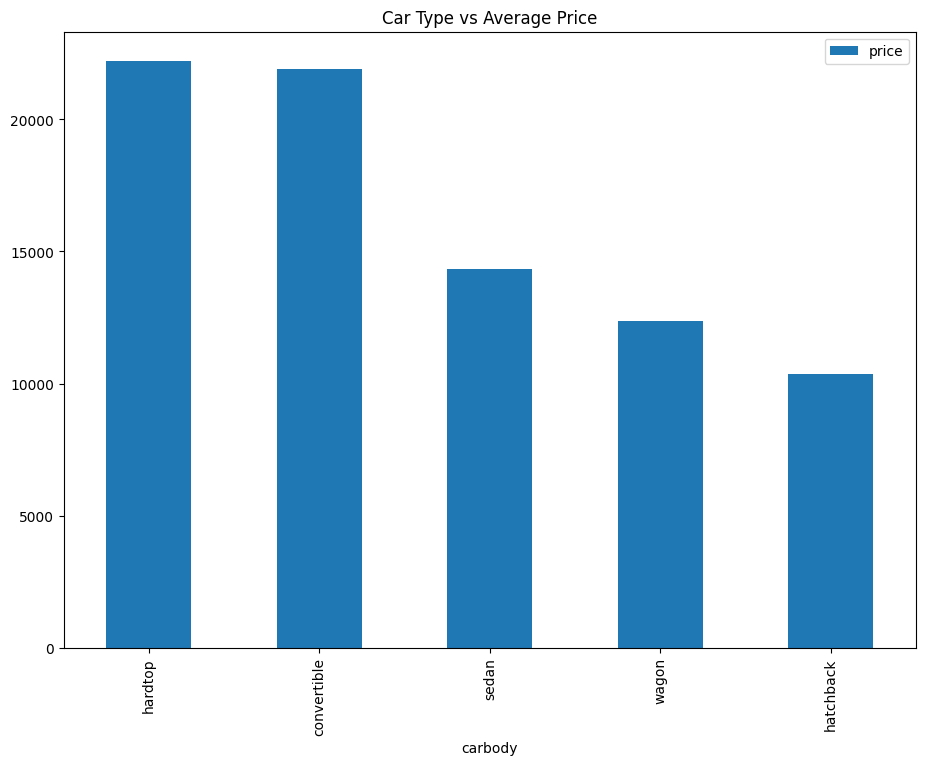

In [ ]:
df = pd.DataFrame(car_dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(11,8))
plt.title('Car Type vs Average Price')
plt.show()

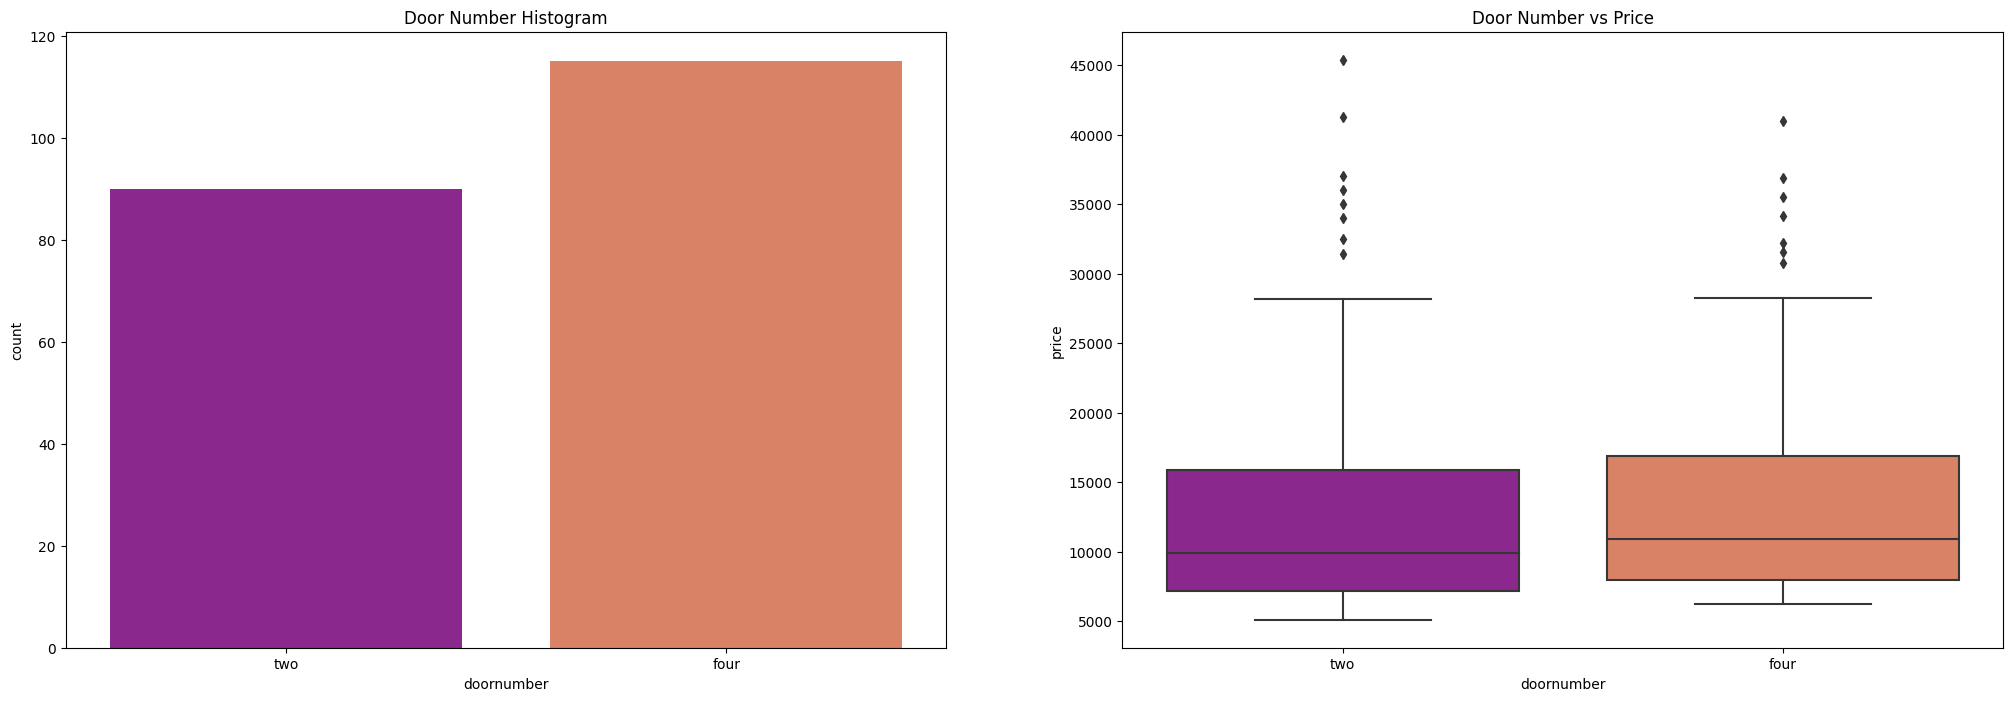

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=car_dataset.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_dataset.doornumber, y=car_dataset.price, palette=("plasma"))

plt.show()

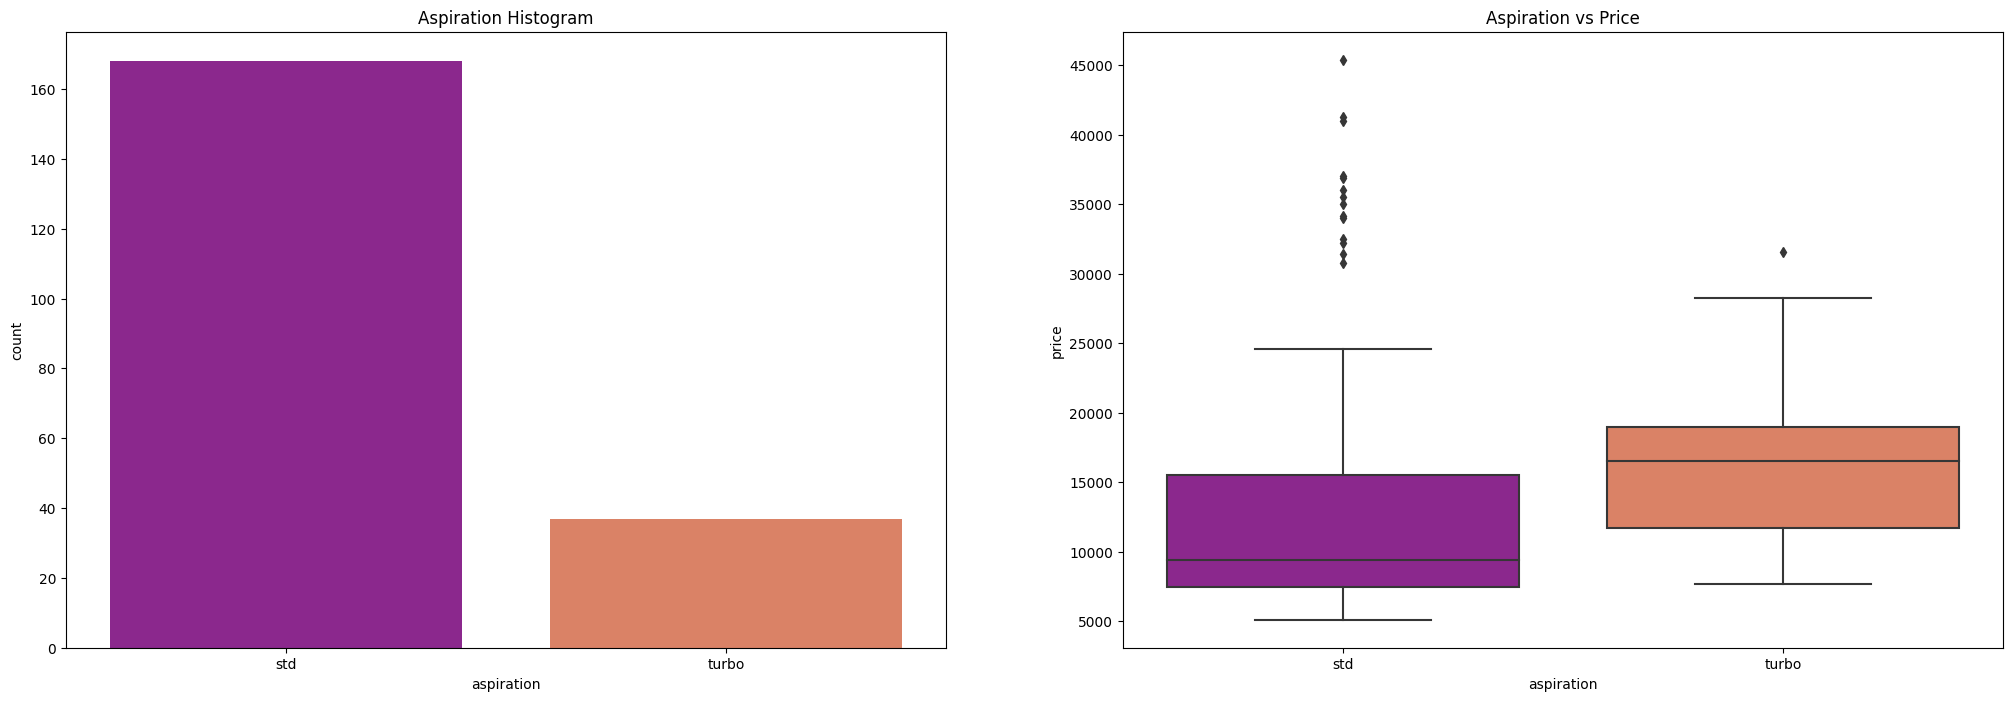

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(x=car_dataset.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_dataset.aspiration, y=car_dataset.price, palette=("plasma"))

plt.show()

In [ ]:
np.corrcoef(car_dataset['carlength'], car_dataset['carwidth'])[0, 1]

0.841118268481846

In [ ]:
#fueleconomy
car_dataset['fueleconomy'] = (0.55 * car_dataset['citympg']) + (0.45 * car_dataset['highwaympg'])

In [ ]:
#Binning the Car Companies based on avg prices of each Company.
car_dataset['price'] = car_dataset['price'].astype('int')
temp = car_dataset.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_dataset['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)


car_dataset.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


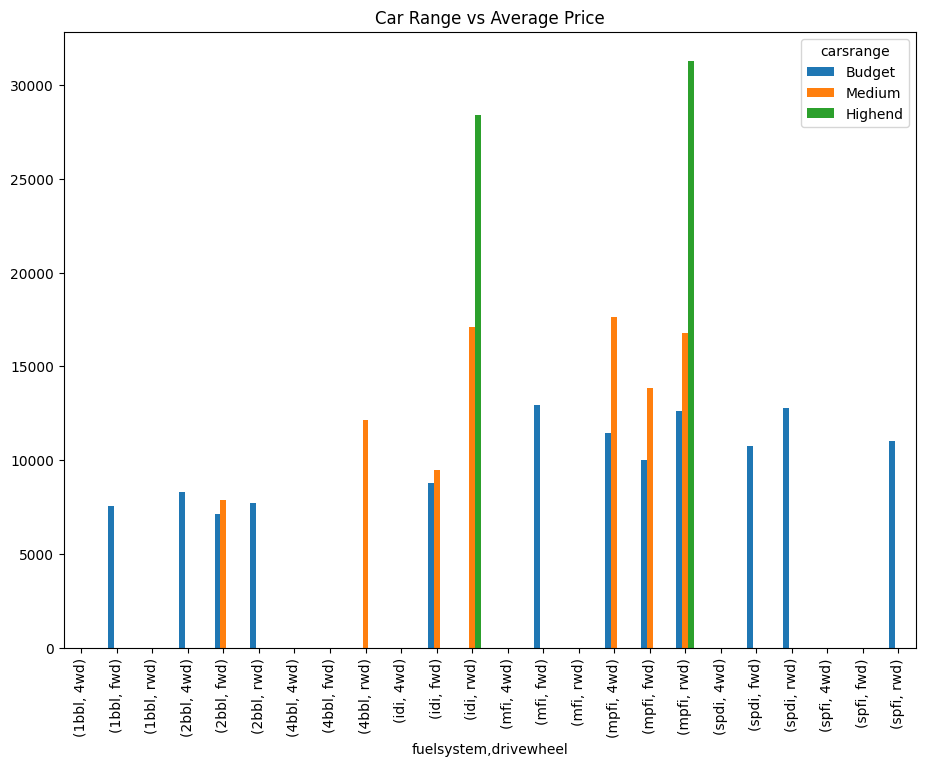

In [ ]:
df = pd.DataFrame(car_dataset.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar(figsize=(11,8))
plt.title('Car Range vs Average Price')

plt.show()

In [ ]:
cars_lr = car_dataset[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [ ]:
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [ ]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:

cars_lr.shape

(205, 31)

In [ ]:
#Train-Test
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


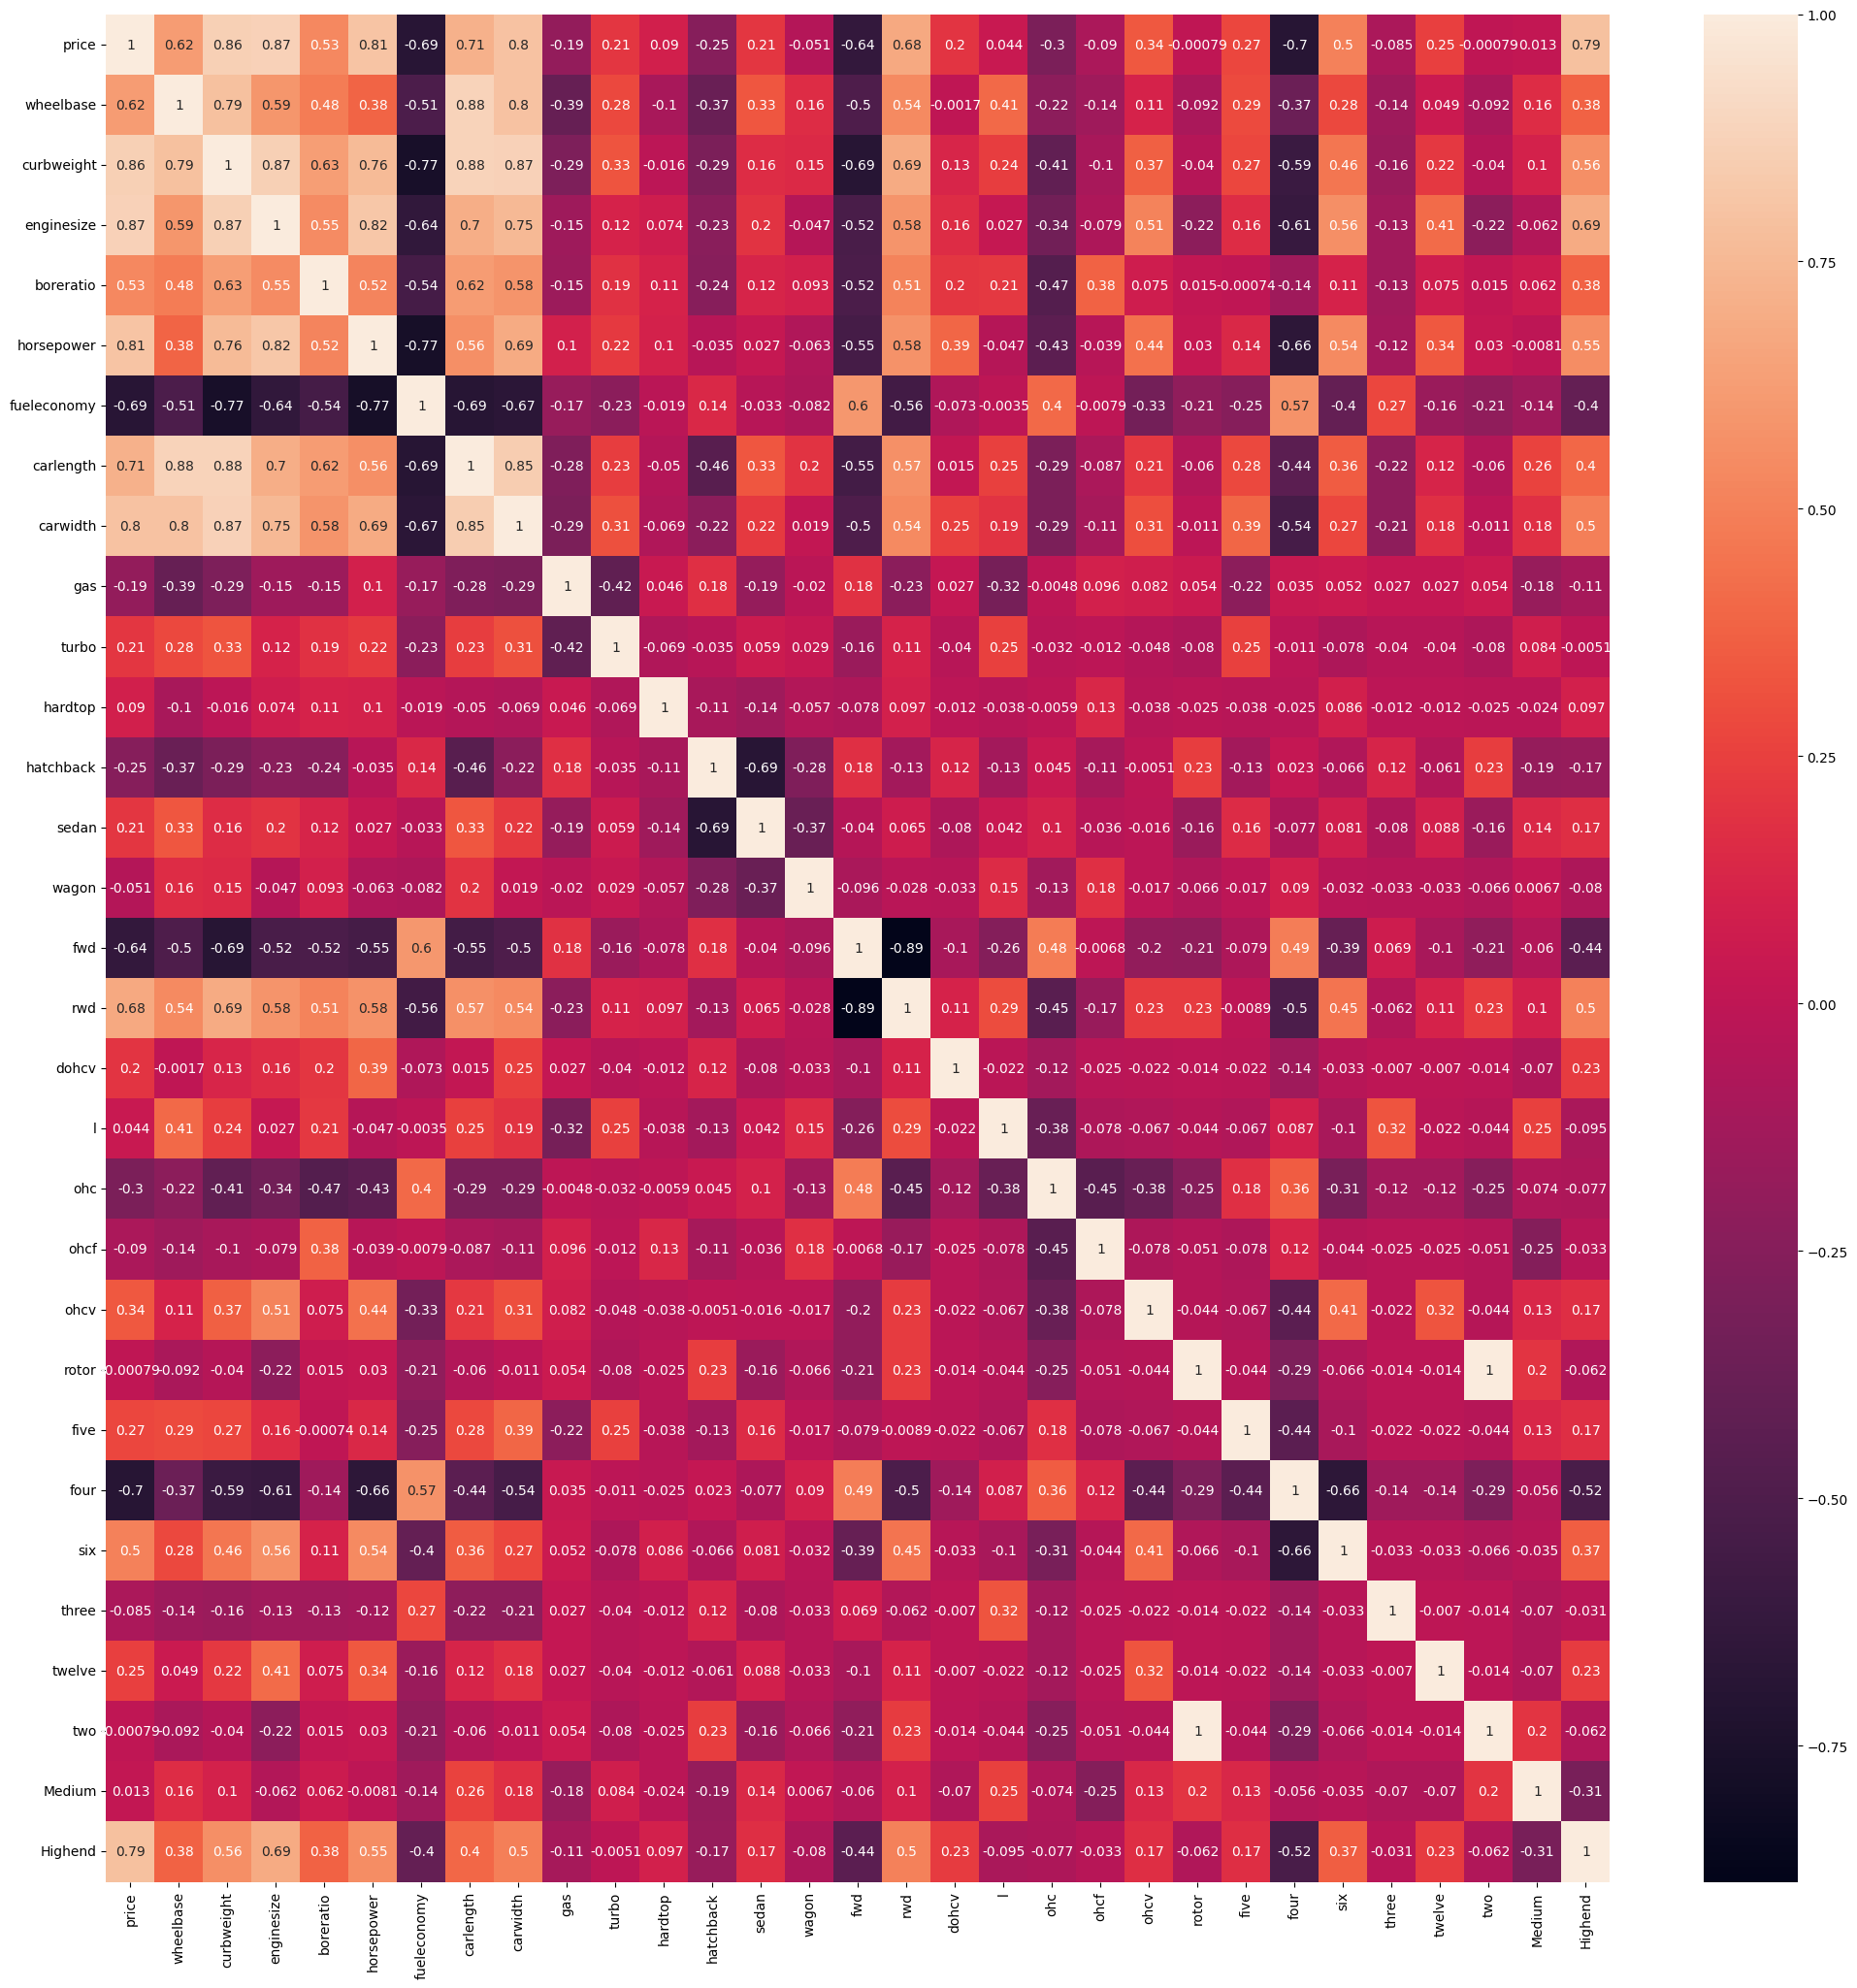

In [ ]:
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

In [ ]:
#Model Building
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train


lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)


list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 8),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('gas', False, 12),
 ('turbo', False, 13),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 11),
 ('rwd', False, 10),
 ('dohcv', True, 1),
 ('l', False, 14),
 ('ohc', False, 2),
 ('ohcf', False, 3),
 ('ohcv', False, 4),
 ('rotor', False, 16),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 9),
 ('twelve', True, 1),
 ('two', False, 15),
 ('Medium', False, 7),
 ('Highend', True, 1)]

In [ ]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'horsepower', 'fueleconomy', 'carwidth',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'five', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [ ]:
X_train_rfe.head()

,wheelbase,curbweight,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,five,four,six,twelve,Highend
122,0.244828,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0,1,0,0,0
125,0.272414,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,0,1,0,0,1
166,0.272414,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0,1,0,0,0
1,0.068966,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0,1,0,0,0
199,0.610345,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0,1,0,0,0


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [ ]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.4
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           3.16e-68
Time:                        14:00:32   Log-Likelihood:                 213.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     127   BIC:                            -348.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0108      0.050      0.214      

In [ ]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)


X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           4.67e-68
Time:                        14:00:53   Log-Likelihood:                 210.58
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     128   BIC:                            -346.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0739      0.044      1.690      0.0

Text(0.5, 0, 'Errors')

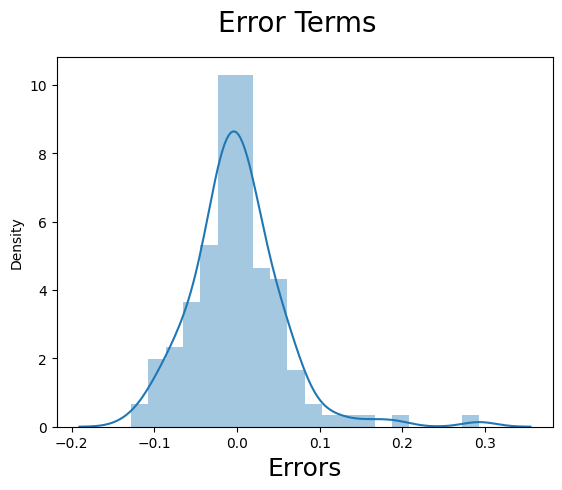

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)



fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     128.0
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           4.67e-68
Time:                        14:01:22   Log-Likelihood:                 210.58
No. Observations:                 143   AIC:                            -391.2
Df Residuals:                     128   BIC:                            -346.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0739      0.044      1.690      0.0